<a href="https://colab.research.google.com/github/nicklausmillican/StatisticalRethinkingIISolutions/blob/main/StatisticalRethinkingSolutions2_Ch12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Checking versions of g++ and make
system("g++ --version", intern = TRUE)
system("make --version", intern = TRUE)

# Install g++ and make if needed
system("sudo apt install g++", intern = TRUE)
system("sudo apt install make", intern = TRUE)


[1] "g++ (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0"                                  
[2] "Copyright (C) 2021 Free Software Foundation, Inc."                          
[3] "This is free software; see the source for copying conditions.  There is NO" 
[4] "warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE."
[5] ""

[1] "GNU Make 4.3"                                                                 
[2] "Built for x86_64-pc-linux-gnu"                                                
[3] "Copyright (C) 1988-2020 Free Software Foundation, Inc."                       
[4] "License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>"
[5] "This is free software: you are free to change and redistribute it."           
[6] "There is NO WARRANTY, to the extent permitted by law."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "g++ is already the newest version (4:11.2.0-1ubuntu1)."         
[5] "g++ set to manually installed."                                 
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

[1] "Reading package lists..."                                       
[2] "Building dependency tree..."                                    
[3] "Reading state information..."                                   
[4] "make is already the newest version (4.3-4.1build1)."            
[5] "make set to manually installed."                                
[6] "0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded."

In [5]:
# Install cmdstanr from GitHub
if (!require(cmdstanr)) {
  devtools::install_github("stan-dev/cmdstanr")
}

# Set up CmdStan if it's not already set up
library(cmdstanr)
if (!cmdstanr::cmdstan_version()) {
  cmdstanr::install_cmdstan()
}

# Verify installation
cmdstanr::check_cmdstan_toolchain()


Loading required package: cmdstanr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘cmdstanr’”



numDeriv     (NA -> 2016.8-1.1) [CRAN]
matrixStats  (NA -> 1.3.0     ) [CRAN]
distribut... (NA -> 0.4.0     ) [CRAN]
tensorA      (NA -> 0.36.2.1  ) [CRAN]
checkmate    (NA -> 2.3.2     ) [CRAN]
abind        (NA -> 1.4-5     ) [CRAN]
posterior    (NA -> 1.6.0     ) [CRAN]


Installing 7 packages: numDeriv, matrixStats, distributional, tensorA, checkmate, abind, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpqKPYbp/remotes1cf7b7b0768/stan-dev-cmdstanr-f2e152b/DESCRIPTION’ ... OK
* preparing ‘cmdstanr’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘cmdstanr_0.8.1.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

This is cmdstanr version 0.8.1.9000

- CmdStanR documentation and vignettes: mc-stan.org/cmdstanr

- Use set_cmdstan_path() to set the path to CmdStan

- Use install_cmdstan() to install CmdStan



ERROR: Error: CmdStan path has not been set yet. See ?set_cmdstan_path.


IF YOU ENCOUNTER AN ERROR, JUST KEEP RUNNING CODE BELOW.

In [6]:
# Install CmdStan using cmdstanr
library(cmdstanr)
cmdstanr::install_cmdstan()

# After installation, set the CmdStan path
cmdstan_path <- cmdstanr::cmdstan_path()
cmdstanr::set_cmdstan_path(cmdstan_path)

# Verify the installation
cmdstanr::cmdstan_version()


The C++ toolchain required for CmdStan is setup properly!

* Latest CmdStan release is v2.35.0

* Installing CmdStan v2.35.0 in /root/.cmdstan/cmdstan-2.35.0

* Downloading cmdstan-2.35.0.tar.gz from GitHub...

* Download complete

* Unpacking archive...

* Building CmdStan binaries...



cp bin/linux-stanc bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/nvector/serial/nvector_serial.o
chmod +x bin/stanc
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials -DNO_FPRINTF_OUTPUT     -O3  -c -x c -include stan/lib/stan_math/lib/sundials_6.1.1/include/stan_sundials_printf_override.hpp stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.c -o stan/lib/stan_math/lib/sundials_6.1.1/src/sundials/sundials_math.o
g++ -pipe   -pthread -D_REENTRANT  -O3 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1

* Finished installing CmdStan to /root/.cmdstan/cmdstan-2.35.0


CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0

CmdStan path set to: /root/.cmdstan/cmdstan-2.35.0



[1] "2.35.0"

In [7]:
# Install necessary packages
install.packages(c("coda", "mvtnorm", "devtools", "loo", "dagitty", "shape"))

# Load devtools for GitHub installation
library(devtools)

# Install rethinking from GitHub
devtools::install_github("rmcelreath/rethinking")


Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘V8’


Loading required package: usethis





── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpqKPYbp/remotes1cf24a4c8cb/rmcelreath-rethinking-ac1b3b2/DESCRIPTION’ ... OK
* preparing ‘rethinking’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘rethinking_2.42.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(rethinking)

Loading required package: posterior

This is posterior version 1.6.0


Attaching package: ‘posterior’


The following objects are masked from ‘package:stats’:

    mad, sd, var


The following objects are masked from ‘package:base’:

    %in%, match


Loading required package: parallel

rethinking (Version 2.42)


Attaching package: ‘rethinking’


The following object is masked from ‘package:stats’:

    rstudent




In [9]:
# Test Installation

## Simulate some data for a binary outcome based on a single predictor
n <- 100
x <- rnorm(n)
prob <- 1 / (1 + exp(-x))
y <- rbinom(n, 1, prob)

## Fit a logistic regression using ulam
fit <- ulam(
  alist(
    y ~ bernoulli( p ),
    logit(p) <- a + b*x,
    a ~ normal(0, 1),
    b ~ normal(0, 1)
  ), data = list(x = x, y = y)
)

precis(fit)

Running MCMC with 1 chain, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 60%]  (Sampling) 
Chain 1 Iteration: 700 / 1000 [ 70%]  (Sampling) 
Chain 1 Iteration: 800 / 1000 [ 80%]  (Sampling) 
Chain 1 Iteration: 900 / 1000 [ 90%]  (Sampling) 
Chain 1 Iteration: 1000 / 1000 [100%]  (Sampling) 
Chain 1 finished in 0.0 seconds.


,mean,sd,5.5%,94.5%,rhat,ess_bulk
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,-0.3083136,0.2294051,-0.6822748,0.04559527,1.001039,327.0158
b,0.9491548,0.2651287,0.5337838,1.37735575,1.010343,360.1521


# Chapter 12

## Easy

### 12E1
What is the difference between an ordered categorical variable and an unordered one? Define and then give an example of each.

#### Answer
Both *ordered-* and *unordered-* categorical models have, well, categories (rather than quantities) as the outcome.  Note, though, that the categories may be encoded as numbers; but these are just labels and do not behave like numbers.

The difference is that the categories for ordered categorical are, well, ordered--like "small", "medium", and "large"--while categories for unordered categorical are, well, unordered--like "red", "blue", "yellow".

Notice that although ordered categorical variables do have an order like numbers, the intervals between the categories are not quantitative: large is *greater* than medium is *greater* than small, but the interval separating large from medium and medium from small is not defined to be equal (like it would be for the integers 1, 2, 3).

Unordered categories are even more disparate from integers.  Now, the categories are not even structured in a hierarchy.

### 12E2
What kind of link function does an ordered logistic regression employ? How does it differ from an ordinary logit link?

#### Answer
These typically use a *cumulative* logit function as the link function.  The cumulative logit function looks like:

$$\text{ln}\left[\frac{p(y_i \le k)}{1 - p(y_i \le k)}\right]$$

This differs from the logit link because a) it can imply >2 outcomes and b) by implying >2 outcomes, it also implies an ordering to the categories.

### 12E3

When count data are zero-inflated, using a model that ignores zero-inflation will tend to induce which kind of inferential error?

#### Answer

I suppose there's a few ways to answer this.  Firstly, of course, it will underpredict the number of 0's and overpredic the number of non-0's in the data.  This will tend to overestimate the mean and underestimate the variance (which will imply more confidence about an incorrect estimate!).

For example, the code below has two random variables; the first in Poisson(3) and the second is also Poisson(3) but with 10% more zeros.

[1] 2.976

[1] 2.645

[1] 2.91634

[1] 3.758734

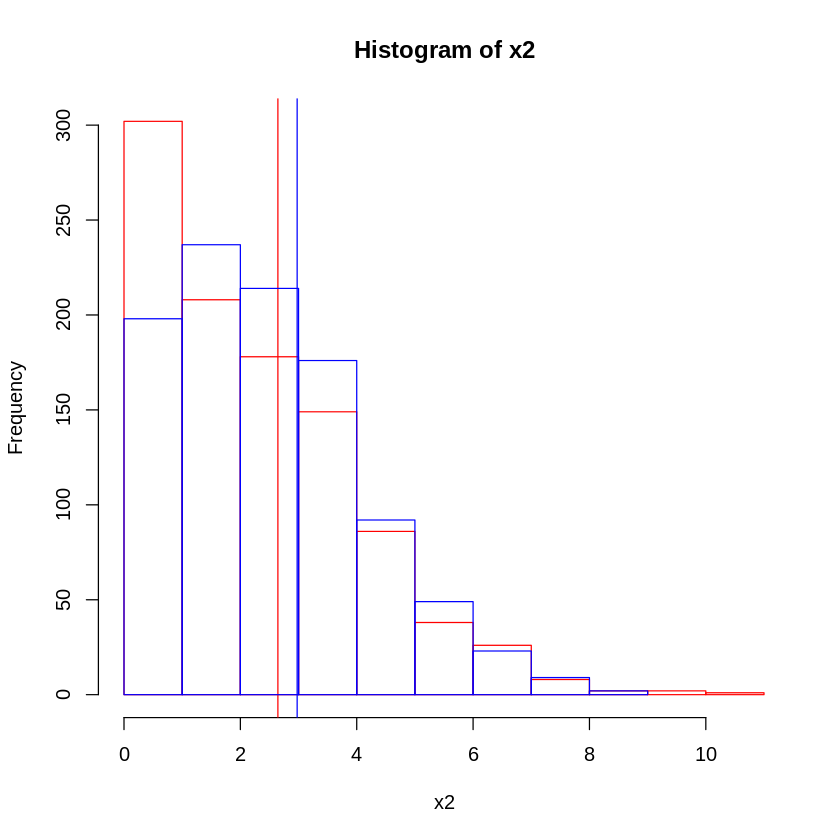

In [ ]:
x1 <- rpois(1000, lambda=3)
x2 <- numeric(1000)

for(i in 1:1000){
  rv <- rbinom(1, 1, 0.1)
  if(rv==0){
    x2[i] <- rpois(1, lambda=3)
  } else{
    x2[i] <- 0
  }
}

mean(x1)
mean(x2)
var(x1)
var(x2)

hist(x2, density=FALSE, col="red"); abline(v=mean(x2), col="red")
hist(x1, density=FALSE, col="blue", add=TRUE); abline(v=mean(x1), col="blue")

The second (zero-inflated) has more variance and a lower mean.

### 12E4

Over-dispersion is common in count data. Give an example of a natural process that might produce over-dispersed counts. Can you also give an example of a process that might produce underdispersed counts?  

I can think of two ways to produce **over-dispersed** data.  The first is when the underlying process producing the outcome is a combination of processes. This is similar to what we saw in 12E3.

In [ ]:
over_dual <- numeric(length=1000)
for(i in 1:1000){
  rv <- rbinom(1, 1, 0.5)
  if(rv==0){
    over_dual[i] <- rpois(1, lambda=8)
  } else{
    over_dual[i] <- rpois(1, lambda=4)
  }
}

# For comparison
#normal_poisson <- rpois(n=1000, lambda=mean(over_dual))

#hist(over_dual, density=FALSE, col="red")
#hist(normal_poisson, density=FALSE, col="black", add=TRUE)
mean(over_dual); var(over_dual)

[1] 5.983

[1] 9.626337

For a Poisson distribution, the mean should equal the variance.  But here, we see that the variance is quite a bit larger.

The second way I can think of **over-dispersion** arising is with (positive or negative) autocorrelation between observations.

In [ ]:
dev <- 2
mu <- 6

over_posCor <- numeric(1000)
over_negCor <- numeric(1000)
over_posCor[1] <- rpois(1, mu)
over_negCor[1] <- rpois(1, mu)
for(i in 2:1000){
  over_posCor[i] <- ifelse(test = over_posCor[i-1] >= mu,
                        yes = rpois(1, mu+dev),
                        no = rpois(1, mu-dev))

  over_negCor[i] <- ifelse(test = over_negCor[i-1] >= mu,
                           yes = rpois(1, mu-dev),
                           no = rpois(1, mu+dev))
}

# For comparison
#normal_posPoisson <- rpois(n=1000, lambda=mean(over_posCor))
#normal_negPoisson <- rpois(n=1000, lambda=mean(over_negCor))

#hist(over_posCor, density=FALSE, col="red")
#hist(normal_posPoisson, density=FALSE, add=TRUE, col="black")
mean(over_posCor); var(over_posCor)

#hist(over_negCor, density=FALSE, col="red")
#hist(normal_negPoisson, density=FALSE, add=TRUE, col="black")
mean(over_negCor); var(over_negCor)

[1] 5.648

[1] 9.8039

[1] 6.049

[1] 9.972572

Conversely, if there is a process that drags successive observations closer to some anchor value (e.g., the mean), then we can get **under-dispersion**.

In [ ]:
under_cor <- numeric(1000)
under_cor[1] <- rpois(1, mu)
for(i in 2:1000){
  if (under_cor[i-1] > mu) {
    under_cor[i] <- max(rpois(1, mu-dev), rpois(1, mu))
  } else {
    under_cor[i] <- min(rpois(1, mu+dev), rpois(1, mu))
  }
}

# For comparison
#normal_poisson <- rpois(n=1000, lambda=mean(under_cor))

# Plotting the distributions
#hist(under_cor, density=FALSE, col="red")
#hist(normal_poisson, density=FALSE, add=TRUE, col="black")
mean(under_cor); var(under_cor)

[1] 5.599

[1] 4.752952

## Medium

### 12M1

At a certain university, employees are annually rated from 1 to 4 on their productivity, with 1 being least productive and 4 most productive. In a certain department at this certain university in a certain year, the numbers of employees receiving each rating were (from 1 to 4): 12, 36, 7, 41.  Compute the log cumulative odds of each rating.

#### Answer
Remember that $\text{log(odds)} = \text{log}\left(\frac{p}{1-p}\right)$.  The *cumulative* log odds extends this for $m$ ordered categories:
$$\text{log(cumlulative odds)} = \text{log}\left(\frac{p_{k}^{(cumulative)}}{1-p_{k}^{(cumulative)}}\right)$$
where $p_{k}^{cumulative} = \sum_{i=1}^k p_i$ and $i \in \{1 \le 2 \le ... \le k \le ... m\}$

In [53]:
ones <- 12
twos <- 36
threes <- 7
fours <- 41

scores <- 1:4
(score_counts <- c(ones, twos, threes, fours))
(probs <- score_counts / sum(score_counts))
(cumulative_probs <- cumsum(probs))
(odds <- cumulative_probs / (1-cumulative_probs))
(log_odds <- log(odds))

[1] 12 36  7 41

[1] 0.12500000 0.37500000 0.07291667 0.42708333

[1] 0.1250000 0.5000000 0.5729167 1.0000000

[1] 0.1428571 1.0000000 1.3414634       Inf

[1] -1.9459101  0.0000000  0.2937611        Inf

### 12M2

Make a version of Figure 12.5 for the employee ratings data given just above.

#### Answer

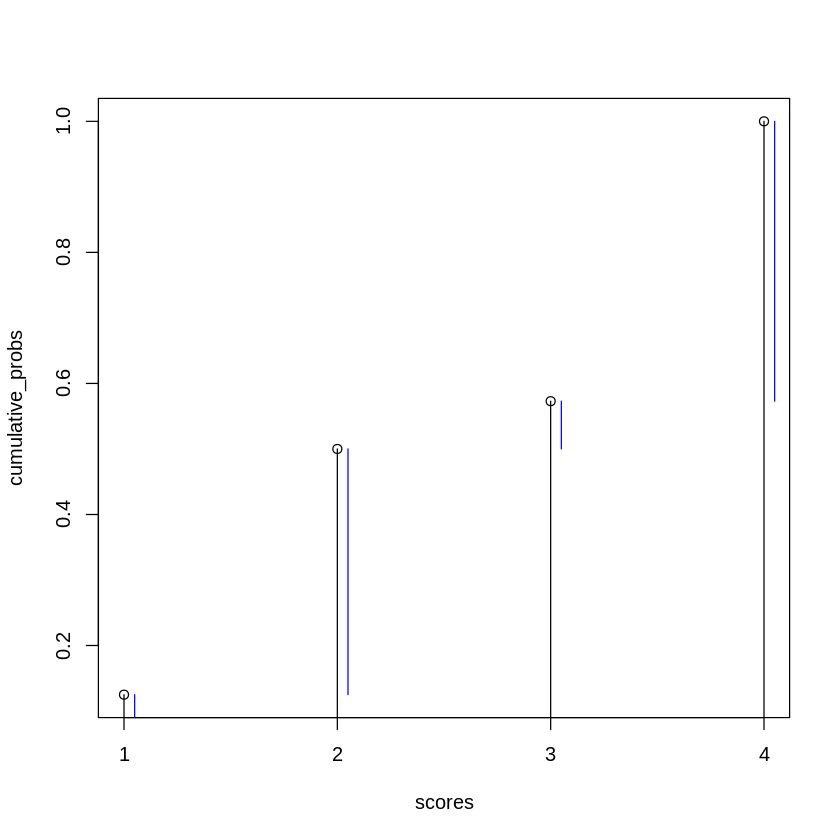

In [57]:
plot(cumulative_probs ~ scores, xaxt="n"); axis(1, at=scores, labels=scores)
lines(c(1,1), c(0,cumulative_probs[1])); lines(c(1.05,1.05), c(cumulative_probs[1]-probs[1], cumulative_probs[1]), col="blue")
lines(c(2,2), c(0,cumulative_probs[2])); lines(c(2.05,2.05), c(cumulative_probs[2]-probs[2], cumulative_probs[2]), col="blue")
lines(c(3,3), c(0,cumulative_probs[3])); lines(c(3.05,3.05), c(cumulative_probs[3]-probs[3], cumulative_probs[3]), col="blue")
lines(c(4,4), c(0,cumulative_probs[4])); lines(c(4.05,4.05), c(cumulative_probs[4]-probs[4], cumulative_probs[4]), col="blue")

I think we can do this a little more skilfully.

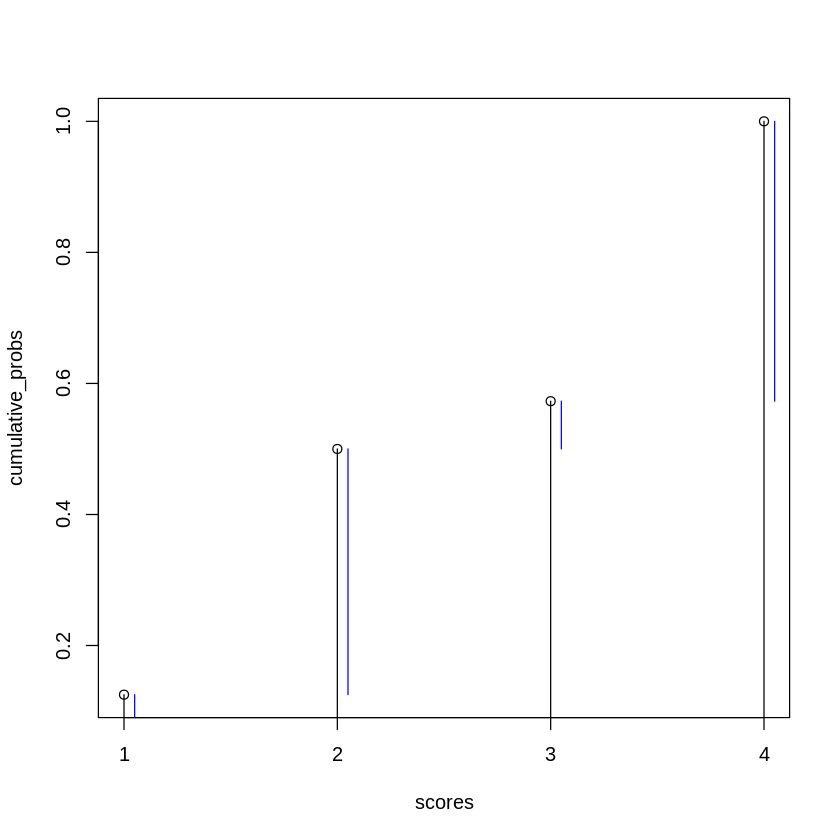

In [59]:
plot(cumulative_probs ~ scores, xaxt="n"); axis(1, at=scores, labels=scores)
for(i in 1:4){
  lines(c(i,i), c(0, cumulative_probs[i]))
  lines(c(i+0.05, i+0.05), c(cumulative_probs[i] - probs[i], cumulative_probs[i]), col="blue")
}